# Tugas 3 Crawling Data PTA dengan Label

## Load Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('ptasudah.xlsx')
df.head()

,NIM,Nama,Judul,Abstrak,Kelas
0,40411100468,A.Ubaidillah S.Kom,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,40411100476,"M. Basith Ardianto,",APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,70411100070,Heri Supriyanto,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Komputasi
3,80411100115,Septian Rahman Hakim,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Komputasi
4,70411100007,Adi Chandra Laksono,Gerak Pekerja Pada Game Real Time Strategy Men...,Gerak pekerja ada pada game yang memiliki genr...,RPL


In [ ]:
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    3
Kelas      0
dtype: int64

In [ ]:
# drop rows with missing values yaknik abstract
df.dropna(subset=['Abstrak'], inplace=True)
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    0
Kelas      0
dtype: int64

In [ ]:
df.count()

NIM        795
Nama       795
Judul      795
Abstrak    795
Kelas      795
dtype: int64

In [ ]:
# jumlah data pada setiap kategori
df['Kelas'].value_counts()

Komputasi    417
RPL          254
NLP          124
Name: Kelas, dtype: int64

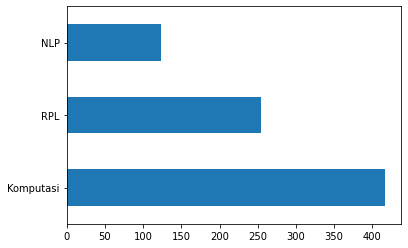

In [ ]:
# plot jumlah data pada setiap kategori
import matplotlib.pyplot as plt

df['Kelas'].value_counts().plot(kind='barh')
plt.show()

## Cleaning

In [ ]:
import re
import string

# Text Cleaning


def cleaning(text):
    # HTML Tag Removal
    text = re.compile(
        '<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [ ]:
df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,NIM,Nama,Judul,Abstrak,Kelas
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL


In [ ]:
# Checkpoint: Export Hasil Text Cleaning
df.to_csv('pta-cleaning.csv')

## Remove Missing Values

In [ ]:
# ubah empty string menjadi NaN
df = df.replace('', np.nan)

In [ ]:
# cek missing value
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    2
Kelas      0
dtype: int64

In [ ]:
# remove rows with missing values
df.dropna(subset=['Abstrak'], inplace=True)
len(df)

793

## Remove Duplicate Values

In [ ]:
# cek apakah masih ada terdapat duplicate data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [ ]:
# cek apakah masih ada terdapat duplicate data pada kolom judul
df[df['Judul'].duplicated()]


,NIM,Nama,Judul,Abstrak,Kelas
673,120411100015,Abdul Ainur Rofik,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Komputasi


In [ ]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [ ]:
# export hasil pre-processing
df.to_csv('pta-preprocessing.csv')

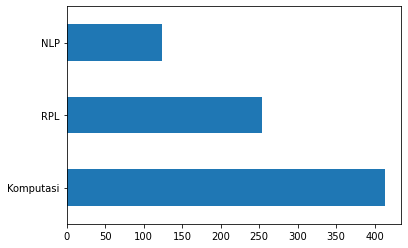

In [ ]:
# Distribusi Kelas pada Data Pre-Processing
df['Kelas'].value_counts().plot(kind='barh')
plt.show()

## Tokenisasi

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Dio\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Dio\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Dio\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Dio\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Dio\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\

True

In [ ]:
from nltk.tokenize import word_tokenize
# tokenisasi judul
df['token_judul'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[['Judul', 'token_judul']].head()

,Judul,token_judul
0,perancangan dan implementasi sistem database t...,"[perancangan, dan, implementasi, sistem, datab..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, dan, monitoring, jaringan,..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
4,gerak pekerja pada game real time strategy men...,"[gerak, pekerja, pada, game, real, time, strat..."


In [ ]:
# tokenisasi abstrak
df['token_abstrak'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[['Abstrak', 'token_abstrak']].tail()

,Abstrak,token_abstrak
793,investasi saham selama ini memiliki resiko ker...,"[investasi, saham, selama, ini, memiliki, resi..."
794,information retrieval ir merupakan pengambilan...,"[information, retrieval, ir, merupakan, pengam..."
795,klasifikasi citra merupakan proses pengelompok...,"[klasifikasi, citra, merupakan, proses, pengel..."
796,identifikasi atribut pejalan kaki merupakan sa...,"[identifikasi, atribut, pejalan, kaki, merupak..."
797,topik deteksi objek telah menarik perhatian ya...,"[topik, deteksi, objek, telah, menarik, perhat..."


## Stopword Removal

In [ ]:
from nltk.corpus import stopwords
from itertools import chain

# stopword removal
stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['token_judul'] = df['token_judul'].apply(lambda x: [w for w in x if not w in stop_words])
df['token_abstrak'] = df['token_abstrak'].apply(lambda x: [w for w in x if not w in stop_words])

In [ ]:
df[['Judul', 'token_judul']].head()

,Judul,token_judul
0,perancangan dan implementasi sistem database t...,"[perancangan, implementasi, sistem, database, ..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaringan, komp..."
2,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
3,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
4,gerak pekerja pada game real time strategy men...,"[gerak, pekerja, game, real, time, strategy, f..."


In [ ]:
df[['Abstrak', 'token_abstrak']].tail()

,Abstrak,token_abstrak
793,investasi saham selama ini memiliki resiko ker...,"[investasi, saham, memiliki, resiko, kerugian,..."
794,information retrieval ir merupakan pengambilan...,"[information, retrieval, ir, pengambilan, info..."
795,klasifikasi citra merupakan proses pengelompok...,"[klasifikasi, citra, proses, pengelompokan, pi..."
796,identifikasi atribut pejalan kaki merupakan sa...,"[identifikasi, atribut, pejalan, kaki, salah, ..."
797,topik deteksi objek telah menarik perhatian ya...,"[topik, deteksi, objek, menarik, perhatian, pe..."


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# stemming
df['token_judul'] = df['token_judul'].progress_apply(lambda x: [stemmer.stem(w) for w in x])

100%|██████████| 792/792 [02:26<00:00,  5.42it/s]


In [ ]:
# Hasil Stemming Judul
df[['Judul', 'token_judul']].tail()

,Judul,token_judul
793,penerapan algoritma long short term memory unt...,"[terap, algoritma, long, short, term, memory, ..."
794,sistem pencarian teks al quran terjemahan berb...,"[sistem, cari, teks, al, quran, terjemah, baha..."
795,klasifikasi kompleksitas visual citra sampah m...,"[klasifikasi, kompleksitas, visual, citra, sam..."
796,identifikasi biner atribut pejalan kaki menggu...,"[identifikasi, biner, atribut, pejal, kaki, ad..."
797,deteksi objek manusia berbasis one stage detec...,"[deteksi, objek, manusia, bas, one, stage, det..."


In [ ]:
# stemming abstrak
df['token_abstrak'] = df['token_abstrak'].progress_apply(lambda x: [stemmer.stem(w) for w in x])

100%|██████████| 792/792 [05:37<00:00,  2.34it/s]


In [ ]:
# Hasil Stemming Abstrak
df[['Abstrak', 'token_abstrak']].tail()

,Abstrak,token_abstrak
793,investasi saham selama ini memiliki resiko ker...,"[investasi, saham, milik, resiko, rugi, gera, ..."
794,information retrieval ir merupakan pengambilan...,"[information, retrieval, ir, ambil, informasi,..."
795,klasifikasi citra merupakan proses pengelompok...,"[klasifikasi, citra, proses, kelompok, piksel,..."
796,identifikasi atribut pejalan kaki merupakan sa...,"[identifikasi, atribut, pejal, kaki, salah, te..."
797,topik deteksi objek telah menarik perhatian ya...,"[topik, deteksi, objek, tarik, perhati, kemban..."


## Export Cleaned Data

In [ ]:
df

,NIM,Nama,Judul,Abstrak,Kelas,token_judul,token_abstrak
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL,"[ancang, implementasi, sistem, database, distr...","[sistem, informasi, akademik, siakad, sistem, ..."
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,"[aplikasi, kontrol, monitoring, jaring, komput...","[jalan, koneksi, jaring, komputer, lancar, gan..."
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,"[sistem, dukung, putus, optimasi, jadwal, mata...","[jadwal, kuliah, guru, kompleks, masalah, vari..."
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,"[sistem, augmented, reality, animasi, benda, g...","[iring, kembang, teknologi, dunia, muncul, tek..."
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL,"[gerak, kerja, game, real, time, strategy, fin...","[gerak, kerja, game, milik, genre, rts, real, ..."
...,...,...,...,...,...,...,...
793,160411100032,Rachmad Agung Pambudi,penerapan algoritma long short term memory unt...,investasi saham selama ini memiliki resiko ker...,NLP,"[terap, algoritma, long, short, term, memory, ...","[investasi, saham, milik, resiko, rugi, gera, ..."
794,160411100182,Nadila Hidayanti,sistem pencarian teks al quran terjemahan berb...,information retrieval ir merupakan pengambilan...,Komputasi,"[sistem, cari, teks, al, quran, terjemah, baha...","[information, retrieval, ir, ambil, informasi,..."
795,160411100077,Afni Sakinah,klasifikasi kompleksitas visual citra sampah m...,klasifikasi citra merupakan proses pengelompok...,Komputasi,"[klasifikasi, kompleksitas, visual, citra, sam...","[klasifikasi, citra, proses, kelompok, piksel,..."
796,160411100084,Friska Fatmawatiningrum,identifikasi biner atribut pejalan kaki menggu...,identifikasi atribut pejalan kaki merupakan sa...,NLP,"[identifikasi, biner, atribut, pejal, kaki, ad...","[identifikasi, atribut, pejal, kaki, salah, te..."


In [ ]:
df['token_judul'] = df['token_judul'].apply(lambda x: ' '.join(x))
df['token_abstrak'] = df['token_abstrak'].apply(lambda x: ' '.join(x))

# export hasil pre-processing
df.to_csv('pta-cleaneddatakelas.csv')